# Libraries

In [ ]:
# install seurat
# remotes::install_github("satijalab/seurat", ref = "release/4.0.0")

# load required libararies
library(Seurat) # scRNAseq analysis toolset
suppressPackageStartupMessages(library(dplyr)) # data manipulation
library(patchwork) # data visualization in grids

Attaching SeuratObject

Attaching sp



In [ ]:
library (dendextend)
library(tidyverse) # metapackage of all tidyverse packages
library(factoextra)
library(NbClust)
#install.packages("arules")
library(arules)
#install.packages("arulesViz")
library(arulesViz)
#install.packages("tidyverse")
library(tidyverse)
#install.packages("readxml")
library(readxl)
#install.packages("knitr")
library(knitr)
library(ggplot2)
#install.packages("lubridate")
library(lubridate)
#install.packages("plyr")
library(plyr)
library(dplyr)


---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v stringr 1.4.0
v tidyr   1.2.0     v forcats 0.5.1
v readr   2.1.2     

-- Conflicts -------------------------------------------------

# Importing data

In [ ]:
pbmc.data <- Read10X(data.dir = "D:/Research/cellTypeSpecificAssociations_v2/Data/PBMC/filtered_gene_bc_matrices/hg19/")
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)

# Pre-processing using Seurat

Source: https://satijalab.org/seurat/articles/pbmc3k_tutorial.html

QC and selecting cells for further analysis

In [ ]:
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

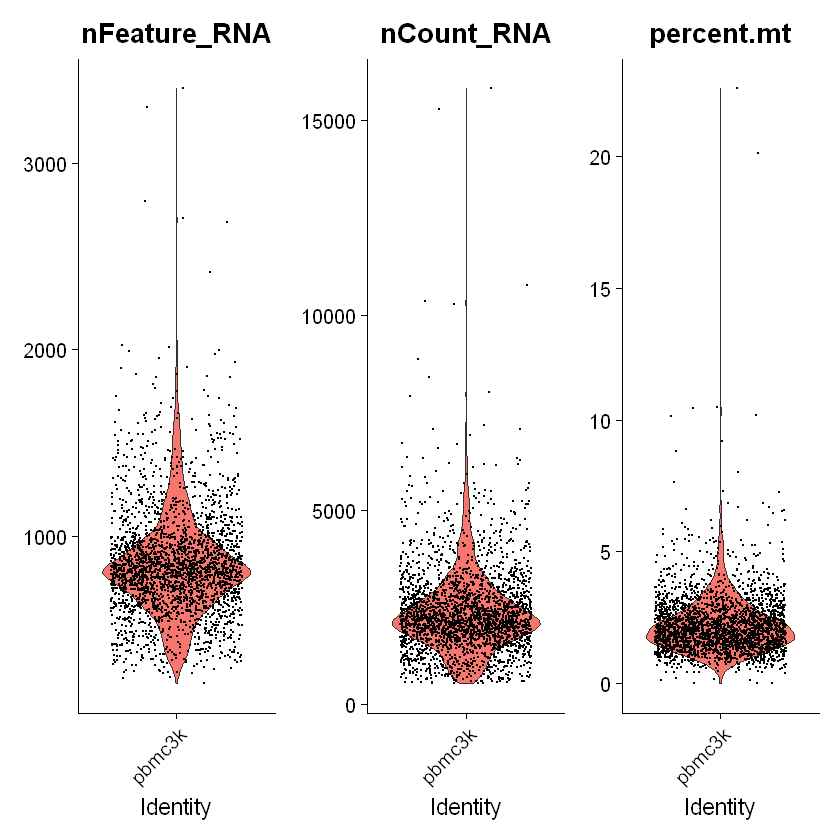

In [ ]:
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

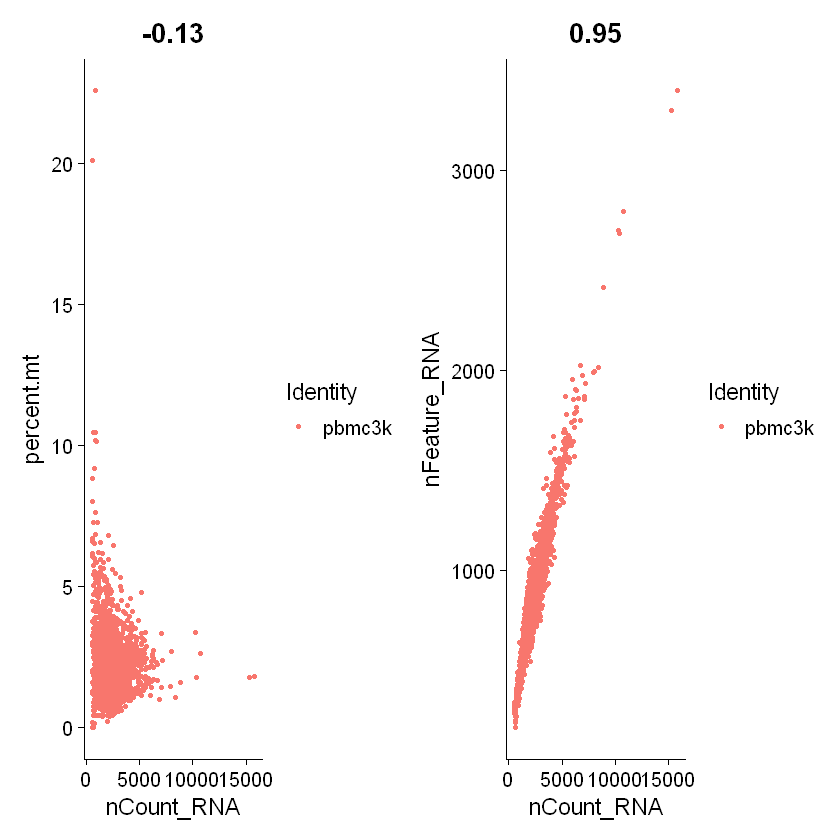

In [ ]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [ ]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

Normalizing the data

In [ ]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

Identification of highly variable features (feature selection)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1 rows containing missing values (geom_point)."
Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 1 rows containing missing values (geom_point)."


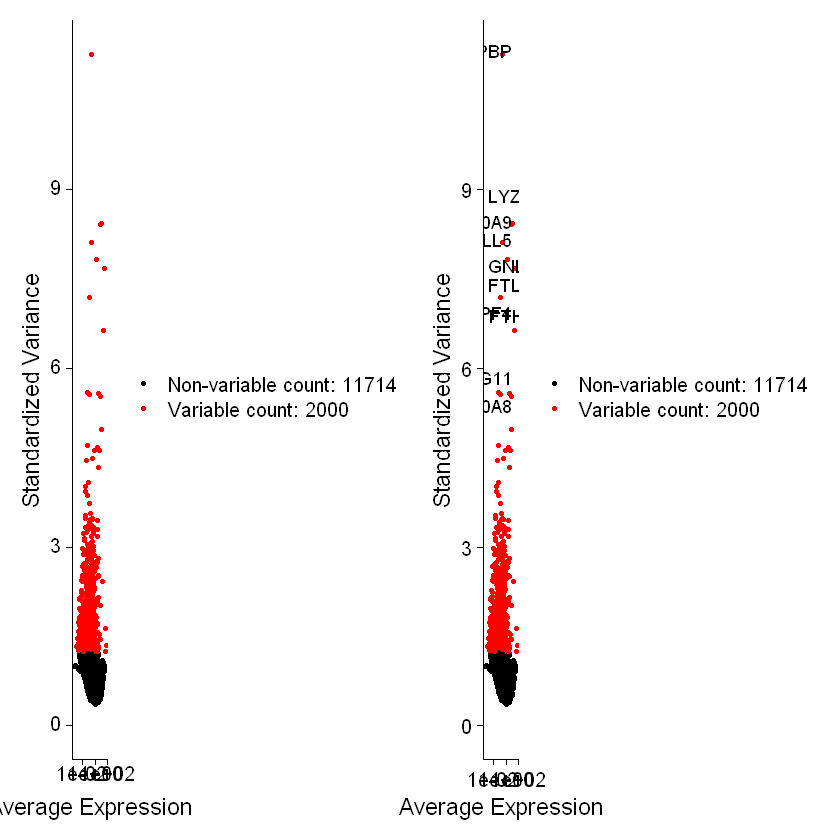

In [ ]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

Scaling the data

In [ ]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



Performing linear dimension reduction

In [ ]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1, HLA-DPA

In [ ]:
# Examine and visualize PCA results a few different ways
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL 
Negative:  MALAT1, LTB, IL32, IL7R, CD2 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA 
PC_ 3 
Positive:  HLA-DQA1, CD79A, CD79B, HLA-DQB1, HLA-DPB1 
Negative:  PPBP, PF4, SDPR, SPARC, GNG11 
PC_ 4 
Positive:  HLA-DQA1, CD79B, CD79A, MS4A1, HLA-DQB1 
Negative:  VIM, IL7R, S100A6, IL32, S100A8 
PC_ 5 
Positive:  GZMB, NKG7, S100A8, FGFBP2, GNLY 
Negative:  LTB, IL7R, CKB, VIM, MS4A7 


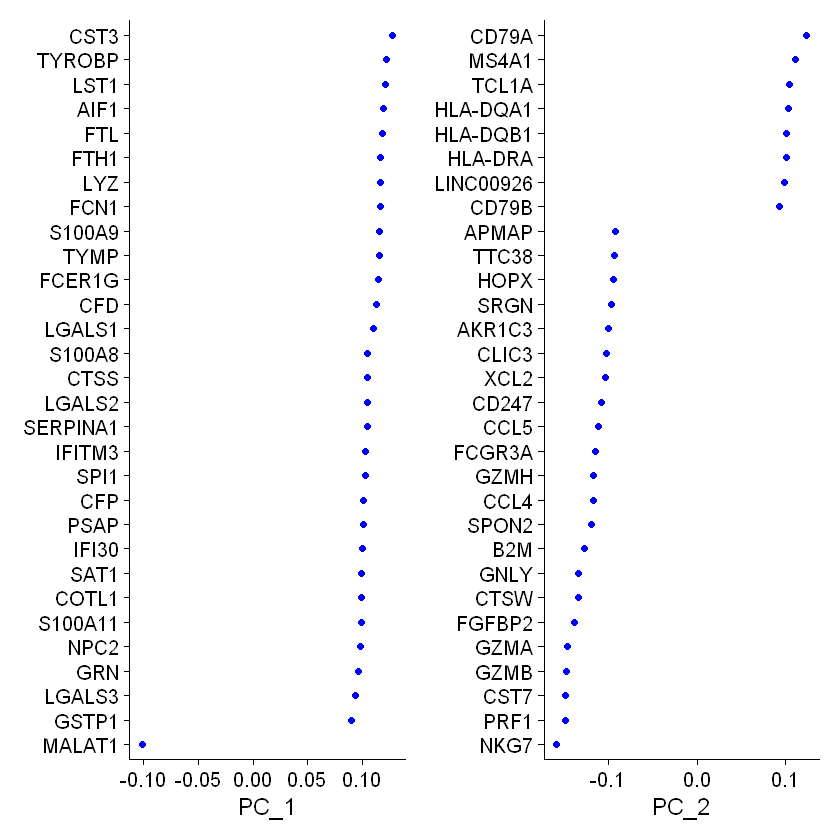

In [ ]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

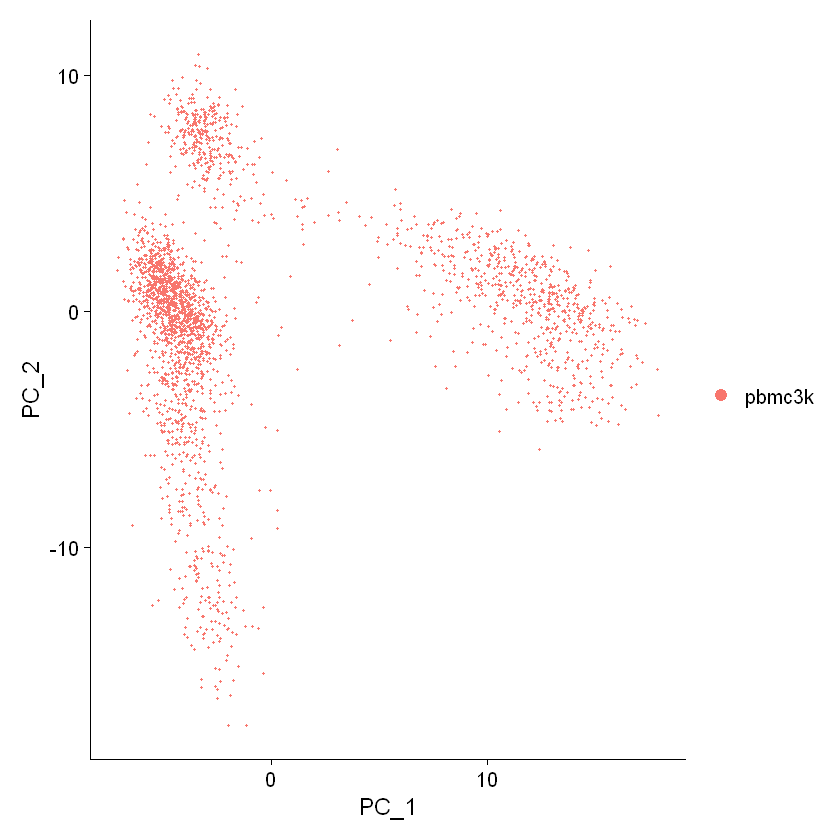

In [ ]:
DimPlot(pbmc, reduction = "pca")

Choosing the no. of PCs

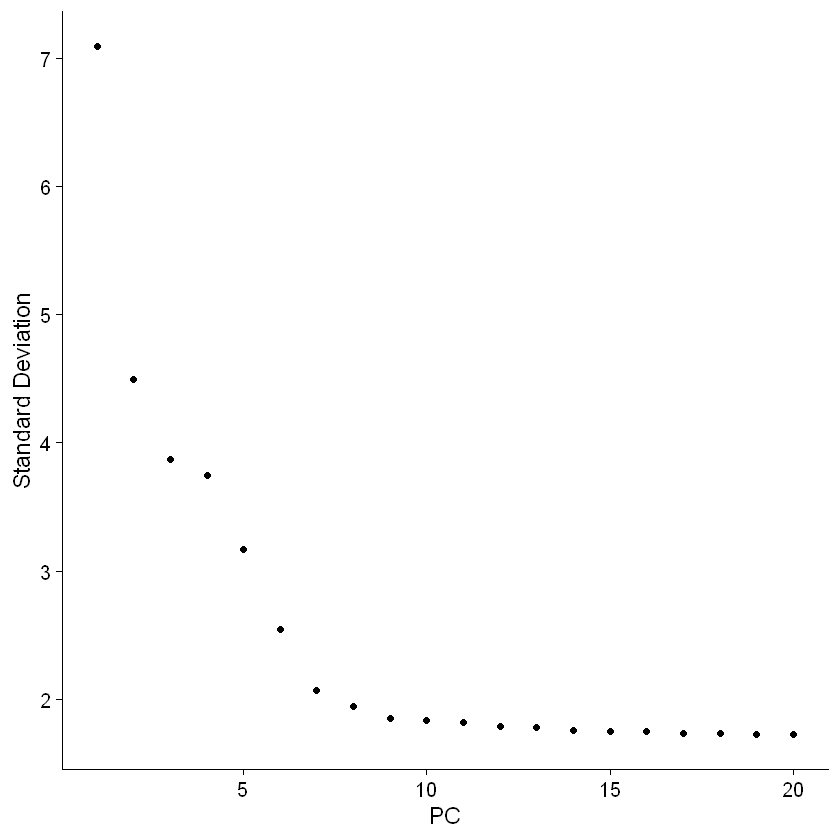

In [ ]:
ElbowPlot(pbmc)

# Clustering the cells

In [ ]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


# Running non-linear dimension reduction (UMAP/tSNE)

In [ ]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
19:12:24 UMAP embedding parameters a = 0.9922 b = 1.112

19:12:24 Read 2638 rows and found 10 numeric columns

19:12:24 Using Annoy for neighbor search, n_neighbors = 30

19:12:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:12:24 Writing NN index file to temp file C:\Users\Dibyendu\AppData\Local\Temp\RtmpMZwNzD\file1e50cbc714a

19:12:24 Searching Annoy index using 1 thread, search_k = 3000

19:12:25 Annoy recall = 100%

19:12:25 Commencing smooth kNN distance calibration using 1 th

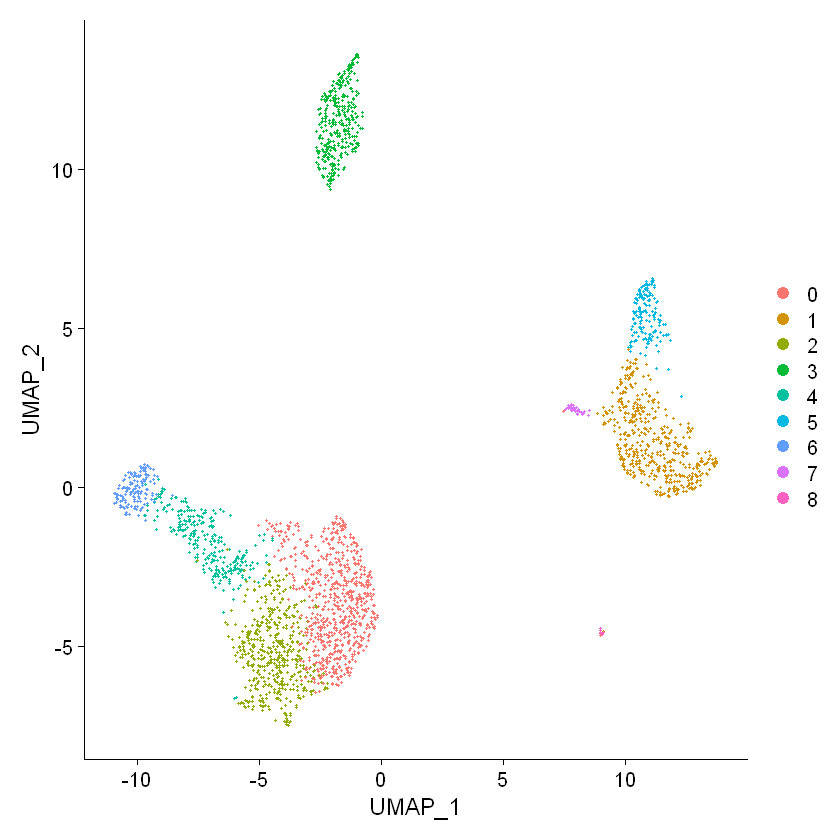

In [ ]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label
# individual clusters
DimPlot(pbmc, reduction = "umap")

# Finding differentially expressed features (cluster biomarkers)

In [ ]:
# find all markers of cluster 0
cluster0.markers <- FindMarkers(pbmc, ident.1 = 0, min.pct = 0.25)
head(cluster0.markers, n = 10)

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS12,1.806317e-144,0.7350248,1.000,0.991,2.477183e-140
RPS6,7.135900e-142,0.6798622,1.000,0.995,9.786173e-138
RPS27,5.257820e-140,0.7207819,0.999,0.992,7.210575e-136
RPL32,4.229582e-136,0.6115515,0.999,0.995,5.800448e-132
RPS14,1.799019e-130,0.6199183,1.000,0.994,2.467175e-126
CYBA,1.235790e-129,-1.5887687,0.658,0.917,1.694762e-125
RPS25,5.507298e-123,0.7442491,0.997,0.975,7.552709e-119
CD74,1.225269e-118,-2.6844368,0.682,0.904,1.680334e-114
RPS3,1.412450e-117,0.6094866,1.000,0.994,1.937034e-113


In [ ]:
# find markers for every cluster compared to all remaining cells, report only the positive
# ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = avg_log2FC) -> top10Markers

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [ ]:
#top 10 markers produced by Seurat
top10Markers

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.860250e-110,0.7793726,0.990,0.977,5.293946e-106,0,RPS3A
1.740957e-109,1.0691658,0.897,0.593,2.387549e-105,0,LDHB
1.167632e-83,1.3335035,0.435,0.108,1.601290e-79,0,CCR7
8.939451e-79,0.9541176,0.838,0.403,1.225956e-74,0,CD3D
3.053170e-53,0.8488853,0.722,0.399,4.187117e-49,0,CD3E
3.284150e-49,1.0512751,0.333,0.103,4.503883e-45,0,LEF1
6.656031e-49,0.9834437,0.623,0.358,9.128080e-45,0,NOSIP
9.308520e-44,1.0274740,0.328,0.110,1.276570e-39,0,PRKCQ-AS1
4.688674e-43,0.9459972,0.435,0.184,6.430048e-39,0,PIK3IP1


Assigning cell types

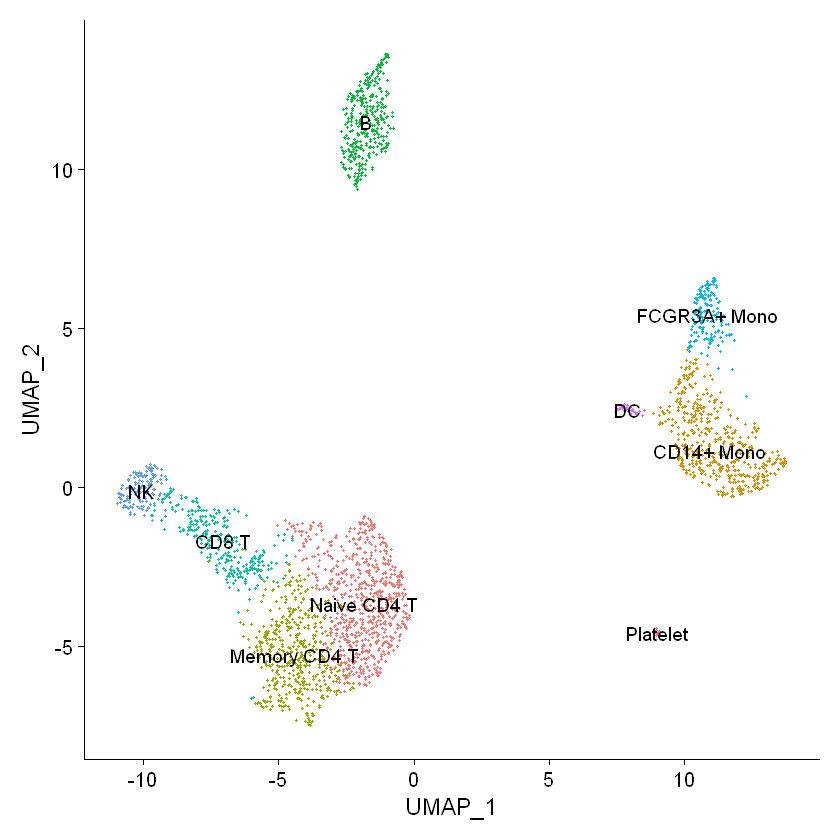

In [ ]:
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

Cluster sizes

In [ ]:
table(pbmc@meta.data['seurat_clusters'])

seurat_clusters
  0   1   2   3   4   5   6   7   8 
711 480 472 344 279 162 144  32  14 

# Extracting expression matrix for each cluster

Cluster labels (Cell annotations)

In [ ]:
classes <- levels(x = pbmc)
classes

[1] "Naive CD4 T"  "CD14+ Mono"   "Memory CD4 T" "B"            "CD8 T"       
[6] "FCGR3A+ Mono" "NK"           "DC"           "Platelet"

RNA

counts: Stores unnormalized data such as raw counts or TPMs

data: Normalized data matrix

scale.data: Scaled data matrix


SCT

counts: corrected counts

data: log1p(counts)

scale.data: pearson residuals

# Analysing cell-type specific associations

**NK Cells**

In [ ]:
NK.data <- as.matrix(GetAssayData(pbmc, slot = "scale.data")[, WhichCells(pbmc, ident = "NK")])

In [ ]:
#Transforming into cell x gene
data <- t(NK.data)

In [ ]:
head(data)

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,⋯,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACCGTGTATGCG-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,-0.4054171,-3.4342074,1.9927045,-0.3122404,-0.2343574,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487
AACCTTACGCGAGA-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,3.1807711,0.7759654,2.1461064,4.2041261,0.6277754,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487
AACGCCCTCGTACA-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,-0.4054171,-1.2349560,0.7943434,-0.3122404,0.1905485,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487
AACGTCGAGTATCG-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,-0.4054171,0.1468175,1.2842128,-0.3122404,-0.3232465,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487
AAGATTACCTCAAG-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,2.3398051,0.8803451,-0.9785100,-0.3122404,-0.3802839,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487
AAGCAAGAGCTTAG-1,-0.05812316,-0.03357571,-0.04166819,-0.03364562,-0.08223981,-0.3171708,-0.05344722,-0.05082183,-0.03308805,-0.2337682,⋯,2.4063931,0.6032326,0.6943814,-0.3122404,0.5835933,-0.07389311,-0.3603564,-0.05240193,-0.2038562,-0.1593487


Building transactional dataset

In [ ]:
data <- ifelse(data <= -1, -1, ifelse(data >= 1, 1, 0))
data <- ifelse(data == 0, 0, 1)

In [ ]:
head(data)

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,⋯,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACCGTGTATGCG-1,0,0,0,0,0,0,0,0,0,0,⋯,0,1,1,0,0,0,0,0,0,0
AACCTTACGCGAGA-1,0,0,0,0,0,0,0,0,0,0,⋯,1,0,1,1,0,0,0,0,0,0
AACGCCCTCGTACA-1,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0
AACGTCGAGTATCG-1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
AAGATTACCTCAAG-1,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0
AAGCAAGAGCTTAG-1,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [ ]:
freq<-table(unlist(data))
freq


      0       1 
1861287  113529 

In [ ]:
trans <- as(data, "transactions")
trans

transactions in sparse format with
 144 transactions (rows) and
 13714 items (columns)

In [ ]:
summary(trans)

transactions as itemMatrix in sparse format with
 144 rows (elements/itemsets/transactions) and
 13714 columns (items) and a density of 0.05748839 

most frequent items:
   NKG7    GZMB    PRF1    CTSW    CST7 (Other) 
    144     142     140     139     139  112825 

element (itemset/transaction) length distribution:
sizes
 493  508  556  562  565  575  576  607  615  627  633  639  642  649  654  657 
   1    1    1    1    1    1    1    1    1    2    1    1    1    1    1    1 
 664  668  672  673  677  682  684  686  691  692  693  695  700  703  705  711 
   1    1    1    1    1    1    2    1    1    1    2    1    1    2    1    2 
 712  713  714  717  719  720  721  727  728  730  731  732  733  740  746  747 
   1    1    1    1    1    2    1    1    2    2    2    1    1    1    1    1 
 751  755  756  757  758  760  761  766  769  770  773  775  776  780  781  785 
   2    1    2    1    1    1    2    1    3    1    1    2    1    2    1    1 
 786  787  792  793  795  

Item frequency (absolute) plot for the top 20 items

Loading required package: RColorBrewer



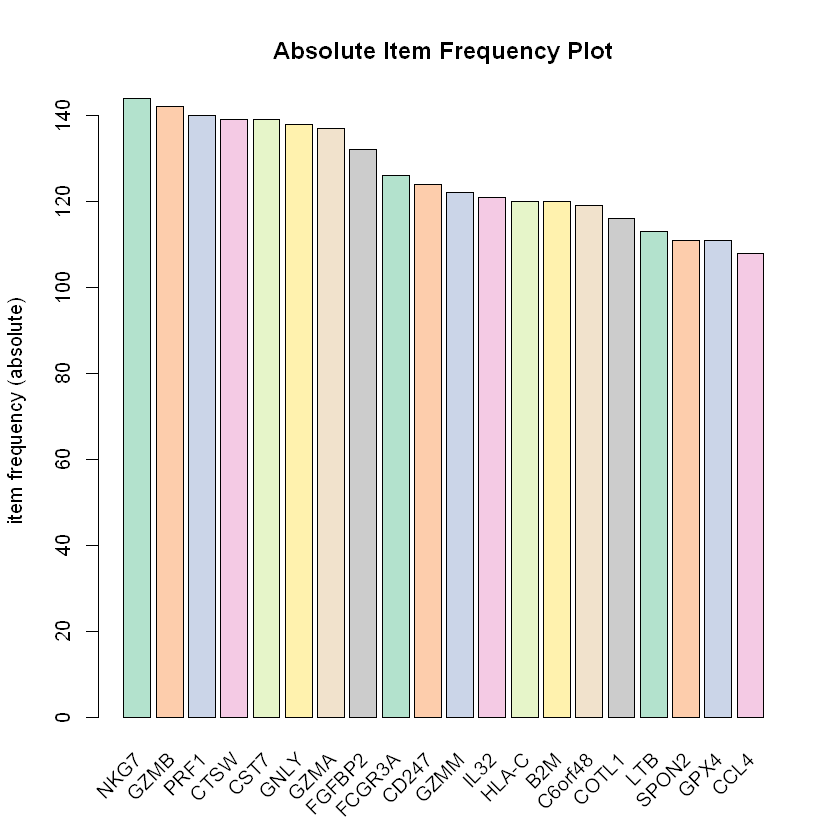

In [ ]:
if (!require("RColorBrewer")) {
  # install color package of R
install.packages("RColorBrewer")
#include library RColorBrewer
library(RColorBrewer)
}
itemFrequencyPlot(trans,topN=20,type="absolute",col=brewer.pal(8,'Pastel2'), main="Absolute Item Frequency Plot")

Item frequency (relative) plot for the top 20 items

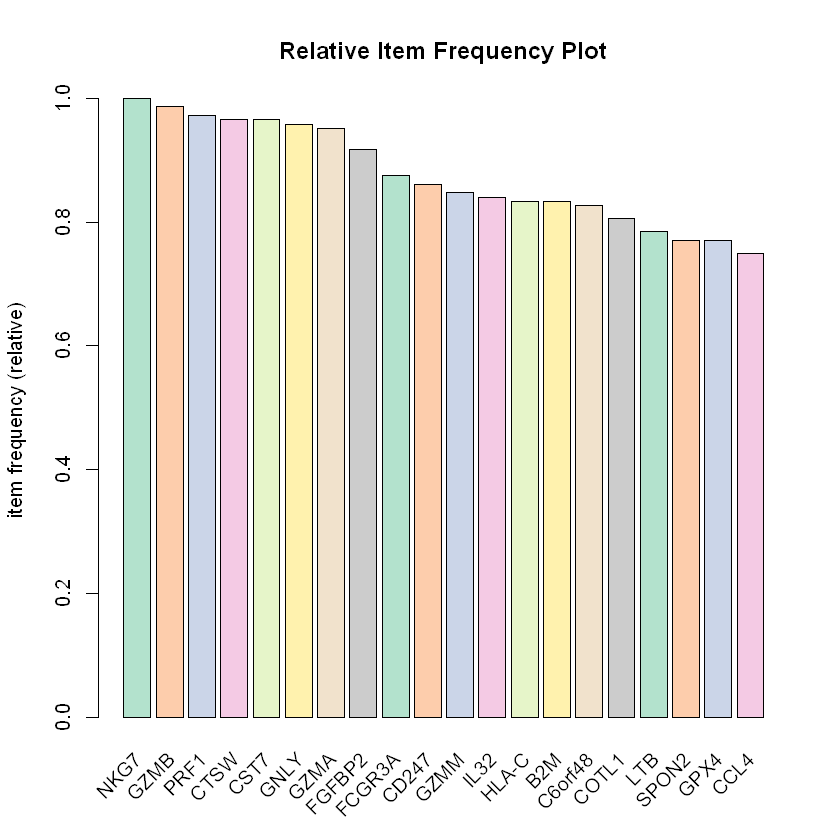

In [ ]:
itemFrequencyPlot(trans,topN=20,type="relative",col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")

# Association Rule Mining

Creating rules using Apriori (Min. relative support = 0.1-0.5, Min. Confidence = 0.8)

In [ ]:
#Relative support = 0.1-0.5
#Relative confidence = 0.8
association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [656398 rule(s)] done [0.09s].
creating S4 object  ... done [0.20s].


In [ ]:
summary(association.rules)

set of 656398 rules

rule length distribution (lhs + rhs):sizes
     2      3      4      5      6      7      8      9     10 
  2021  20510  79138 158115 184941 133615  59878  15958   2222 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   5.884   7.000  10.000 

summary of quality measures:
    support         confidence        coverage           lift       
 Min.   :0.5000   Min.   :0.8000   Min.   :0.5000   Min.   :0.9351  
 1st Qu.:0.5069   1st Qu.:0.9130   1st Qu.:0.5278   1st Qu.:0.9984  
 Median :0.5278   Median :0.9610   Median :0.5625   Median :1.0045  
 Mean   :0.5419   Mean   :0.9431   Mean   :0.5766   Mean   :1.0105  
 3rd Qu.:0.5556   3rd Qu.:0.9865   3rd Qu.:0.6111   3rd Qu.:1.0177  
 Max.   :0.9861   Max.   :1.0000   Max.   :1.0000   Max.   :1.2038  
     count       
 Min.   : 72.00  
 1st Qu.: 73.00  
 Median : 76.00  
 Mean   : 78.03  
 3rd Qu.: 80.00  
 Max.   :142.00  

mining info:
  data ntransactions support confidence
 trans          

In [ ]:
inspect(association.rules[1:20])

     lhs           rhs    support   confidence coverage  lift      count
[1]  {LY6E}     => {NKG7} 0.5000000 1.0000000  0.5000000 1.0000000 72   
[2]  {EIF4A2}   => {CTSW} 0.5000000 1.0000000  0.5000000 1.0359712 72   
[3]  {EIF4A2}   => {GZMB} 0.5000000 1.0000000  0.5000000 1.0140845 72   
[4]  {EIF4A2}   => {NKG7} 0.5000000 1.0000000  0.5000000 1.0000000 72   
[5]  {IER2}     => {NKG7} 0.5069444 1.0000000  0.5069444 1.0000000 73   
[6]  {FXYD5}    => {GZMB} 0.5000000 0.9863014  0.5069444 1.0001929 72   
[7]  {FXYD5}    => {NKG7} 0.5069444 1.0000000  0.5069444 1.0000000 73   
[8]  {PSME1}    => {NKG7} 0.5069444 1.0000000  0.5069444 1.0000000 73   
[9]  {COX7C}    => {PRF1} 0.5000000 0.9863014  0.5069444 1.0144814 72   
[10] {COX7C}    => {GZMB} 0.5000000 0.9863014  0.5069444 1.0001929 72   
[11] {COX7C}    => {NKG7} 0.5069444 1.0000000  0.5069444 1.0000000 73   
[12] {CAP1}     => {CTSW} 0.5000000 0.9863014  0.5069444 1.0217798 72   
[13] {CAP1}     => {GZMB} 0.5069444 1.0000000  0.50

Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(association.rules, association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 654615

In [ ]:
if (length(subset.rules) > 0)
{
    subRules <- association.rules[-subset.rules] # remove subset rules
    print(subRules)
} else
{
    subRules <- association.rules
    print("No redundant rule")
}

set of 1783 rules 


In [ ]:
#mean.lift <- mean(quality(subset.association.rules)$lift)
#subRules<-association.rules[quality(subset.association.rules)$lift>mean.lift]

Filtering rules by lift

In [ ]:
#A lift ratio larger than 1.0 implies that the relationship between 
#the antecedent and the consequent is more significant than would be 
#expected if the two sets were independent.
filteredRules <- subRules[quality(subRules)$lift > 1]
filteredRules

set of 932 rules 

In [ ]:
#Sorting rules by lift
sortedRules <- sort(filteredRules, by = "lift")

Plotting sortedSubRules

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



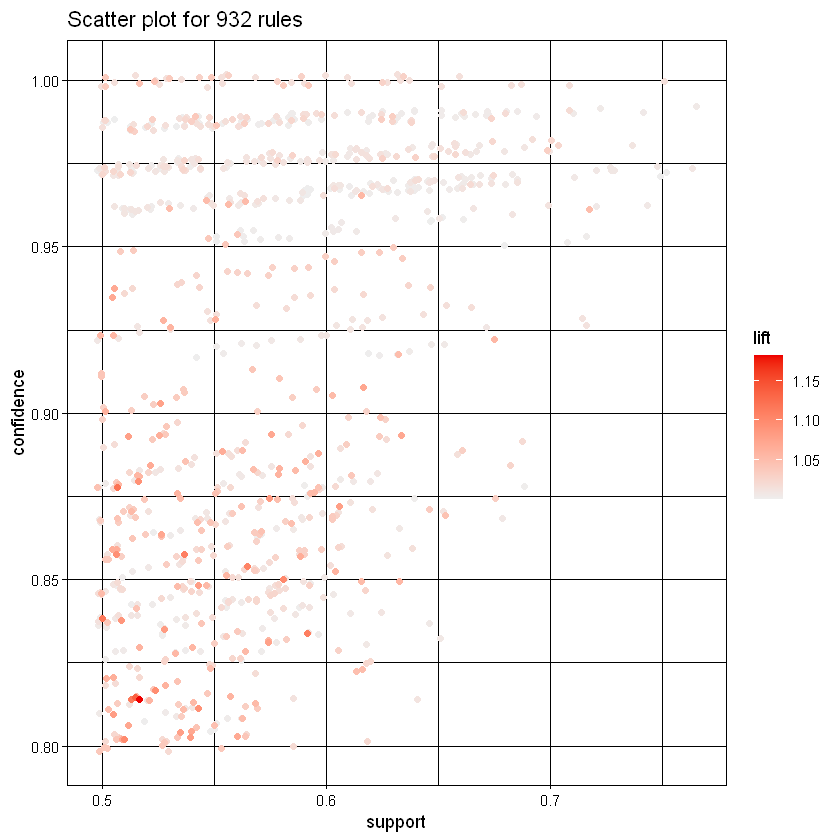

In [ ]:
plot(sortedRules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



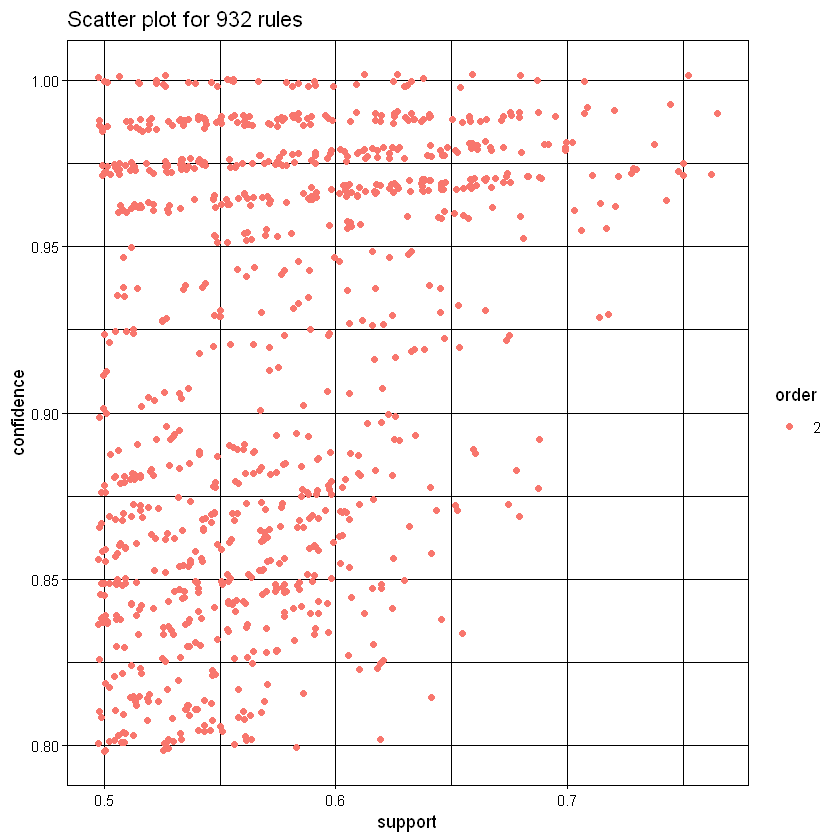

In [ ]:
plot(sortedRules,method="two-key plot")

In [ ]:
top100Rules <- head(sortedRules, n = 100, by = "confidence")

In [ ]:
inspect(top100Rules)

      lhs            rhs    support   confidence coverage  lift     count
[1]   {RPS9}      => {GNLY} 0.5138889 1.0000000  0.5138889 1.043478  74  
[2]   {IFITM2}    => {GNLY} 0.5208333 1.0000000  0.5208333 1.043478  75  
[3]   {EIF4A2}    => {CTSW} 0.5000000 1.0000000  0.5000000 1.035971  72  
[4]   {TMA7}      => {CTSW} 0.5277778 1.0000000  0.5277778 1.035971  76  
[5]   {RPS19}     => {CST7} 0.5000000 1.0000000  0.5000000 1.035971  72  
[6]   {RPL12}     => {CST7} 0.5486111 1.0000000  0.5486111 1.035971  79  
[7]   {RBM3}      => {CTSW} 0.5902778 1.0000000  0.5902778 1.035971  85  
[8]   {PPP1R18}   => {CST7} 0.5833333 1.0000000  0.5833333 1.035971  84  
[9]   {GPSM3}     => {PRF1} 0.5416667 1.0000000  0.5416667 1.028571  78  
[10]  {KLF2}      => {PRF1} 0.5555556 1.0000000  0.5555556 1.028571  80  
[11]  {RHOC}      => {PRF1} 0.5763889 1.0000000  0.5763889 1.028571  83  
[12]  {SEPT7}     => {PRF1} 0.5902778 1.0000000  0.5902778 1.028571  85  
[13]  {PSMB10}    => {PRF1} 0.6250000 

Warning message:
"ggrepel: 32 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


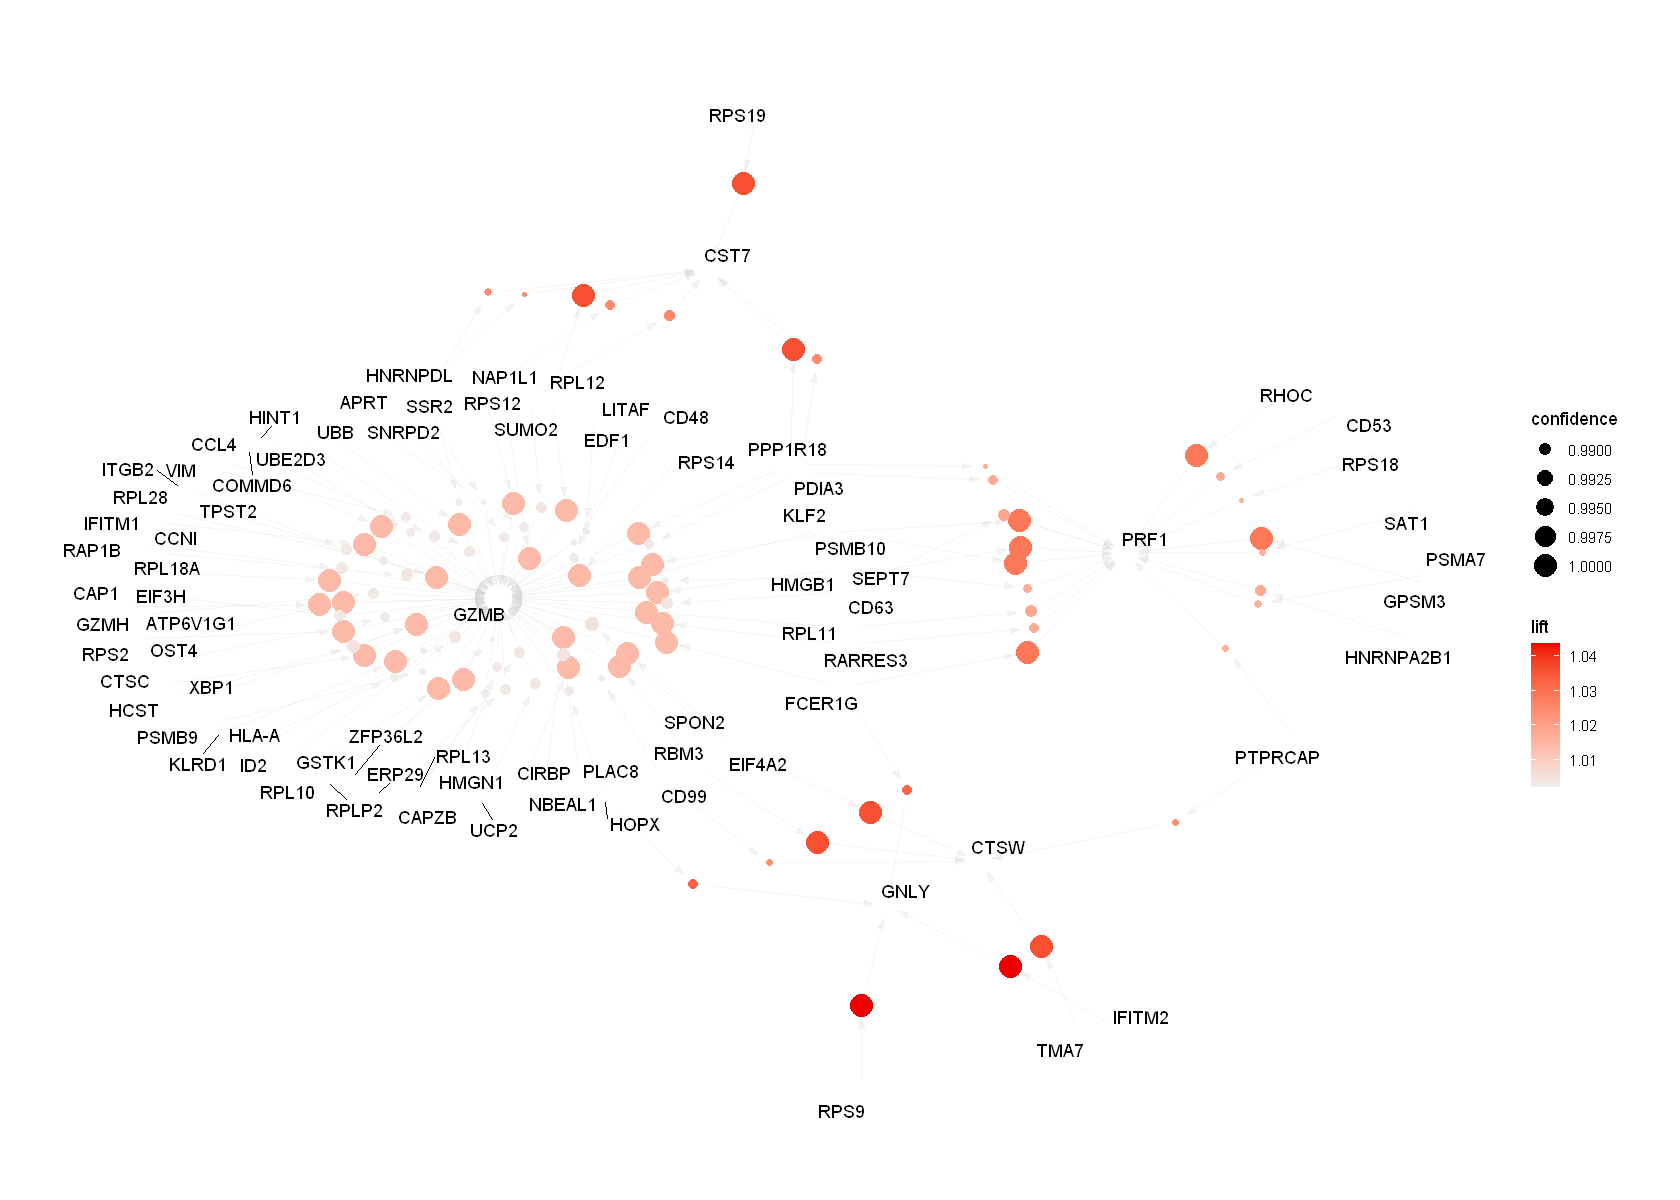

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
plot(top100Rules, method = "graph", measure = "confidence", shading="lift")

In [ ]:
plot(top100Rules, method = "graph",  engine = "htmlwidget")

HTML widgets cannot be represented in plain text (need html)

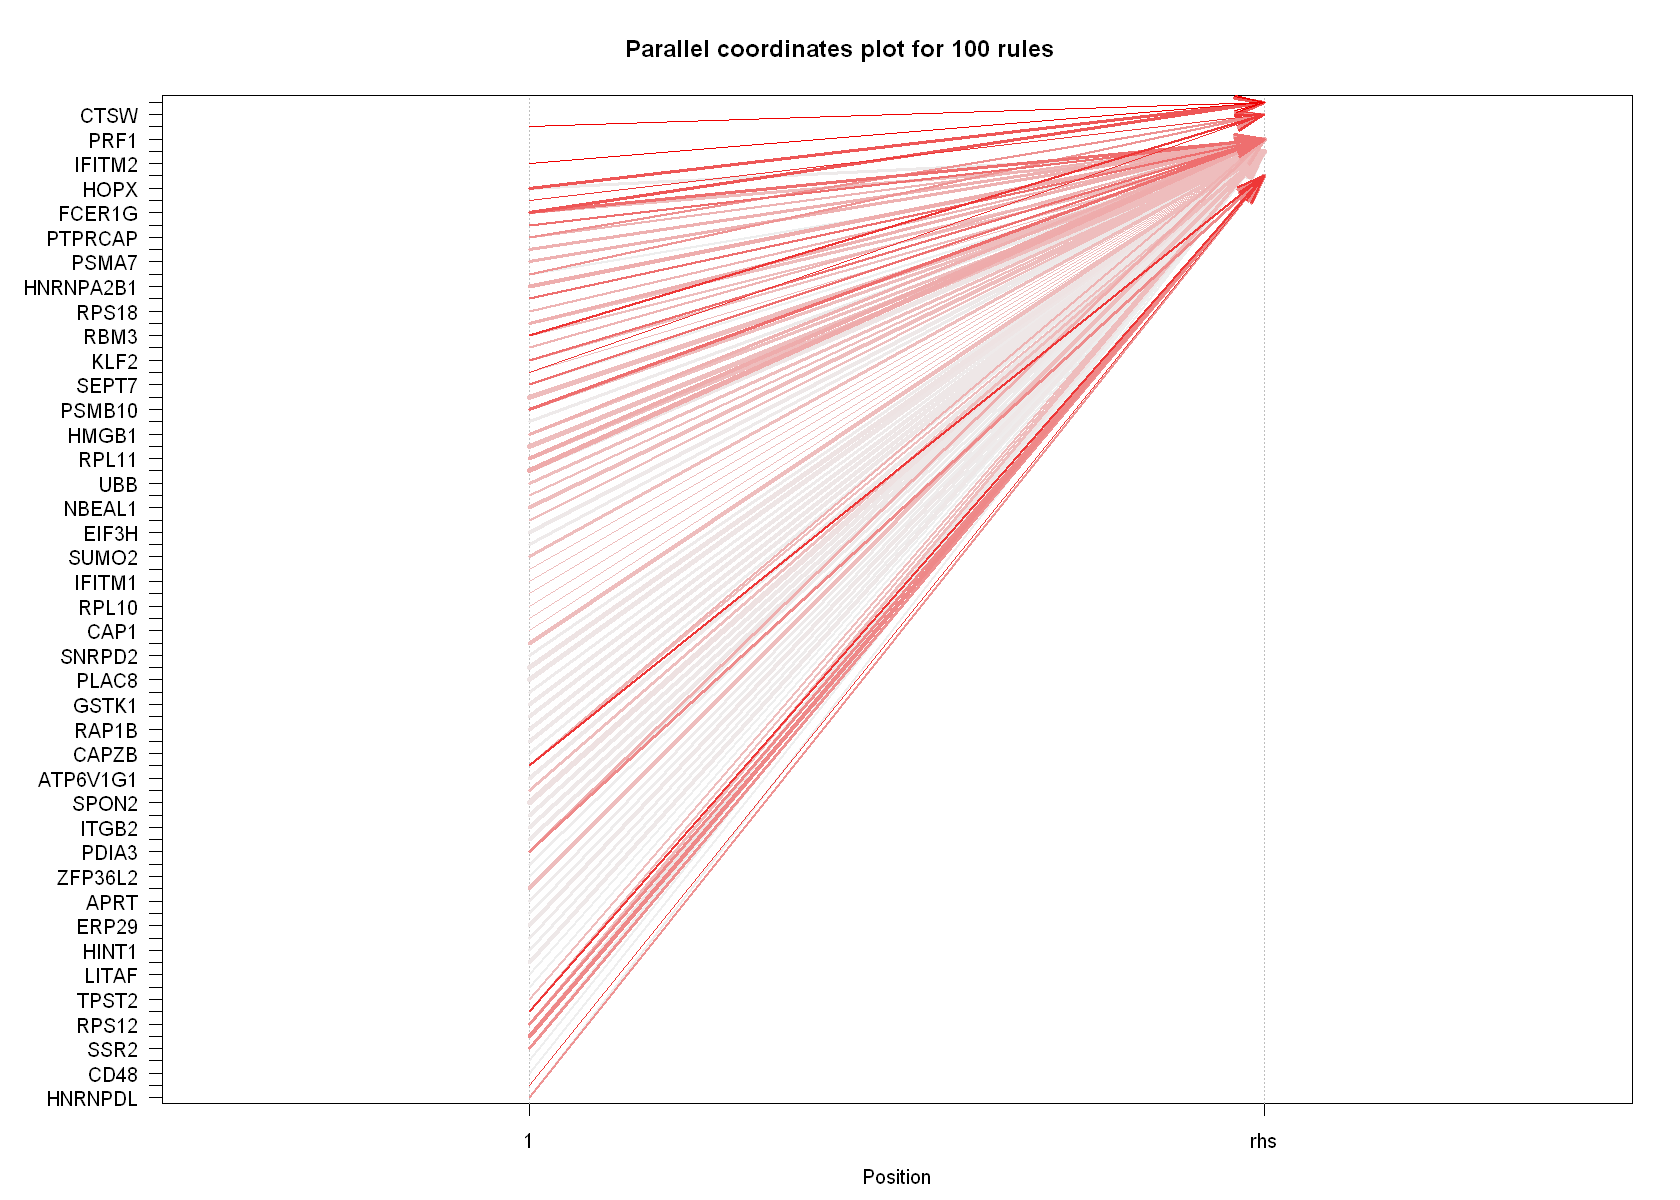

In [ ]:
plot(top100Rules, method="paracoord", control=list(reorder=TRUE))

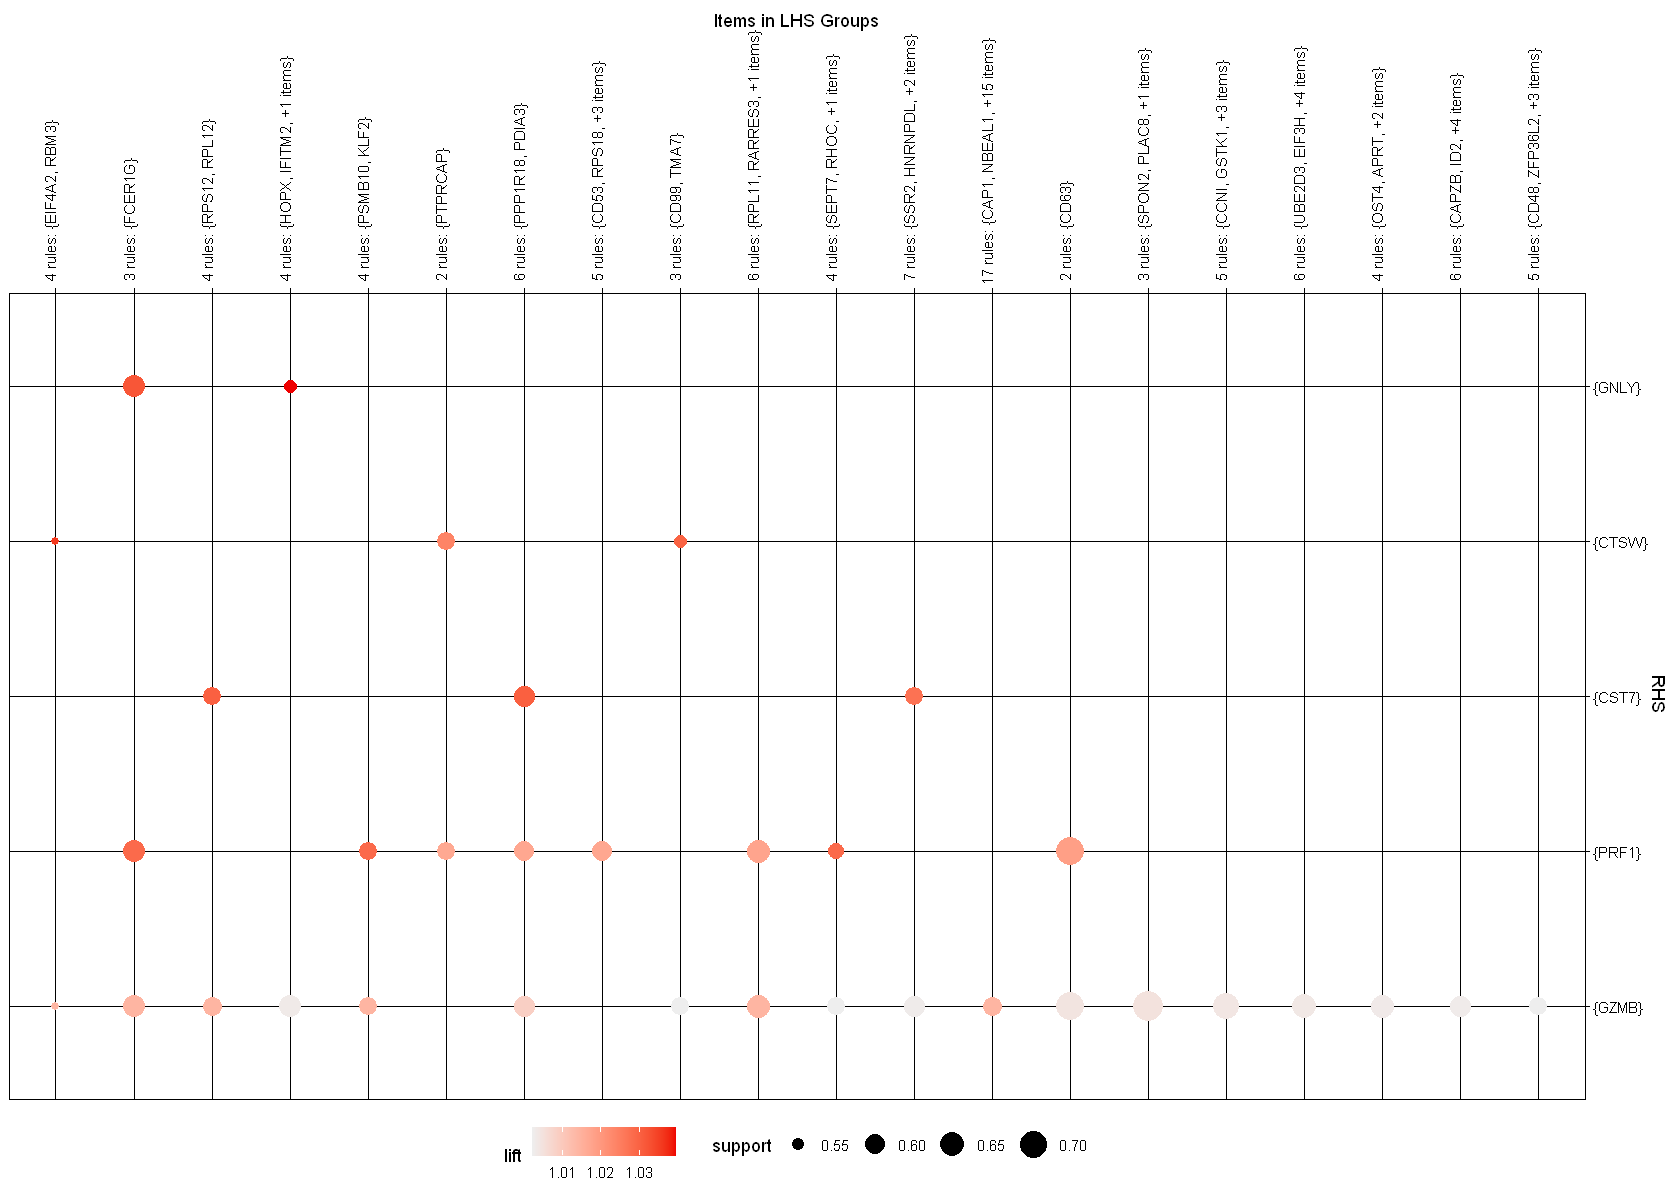

In [ ]:
plot(top100Rules, method="grouped")

Exporting top rules

In [ ]:
rule_data <- DATAFRAME(top100Rules, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
#write.csv(rule_data, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/top100Rules.csv')

Extracting genes associated with top rules

In [ ]:
str(rule_data)

'data.frame':	100 obs. of  7 variables:
 $ LHS       : Factor w/ 77 levels "RPS9","IFITM2",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ RHS       : Factor w/ 5 levels "GNLY","CTSW",..: 1 1 2 2 3 3 2 3 4 4 ...
 $ support   : num  0.514 0.521 0.5 0.528 0.5 ...
 $ confidence: num  1 1 1 1 1 1 1 1 1 1 ...
 $ coverage  : num  0.514 0.521 0.5 0.528 0.5 ...
 $ lift      : num  1.04 1.04 1.04 1.04 1.04 ...
 $ count     : int  74 75 72 76 72 79 85 84 78 80 ...


In [ ]:
rule_data$LHS

[1] RPS9      IFITM2    EIF4A2    TMA7      RPS19     RPL12     RBM3     
  [8] PPP1R18   GPSM3     KLF2      RHOC      SEPT7     PSMB10    FCER1G   
 [15] EIF4A2    CAP1      CIRBP     RPL10     RPLP2     IFITM1    RPS14    
 [22] KLF2      RPL12     TPST2     KLRD1     RBM3      XBP1      UBB      
 [29] PPP1R18   HMGB1     SUMO2     RARRES3   RPS2      PSMB10    FCER1G   
 [36] NBEAL1    RPS12     GZMH      CTSC      RPL11     RPL18A    CCL4     
 [43] SPON2     HCST      PLAC8     CD63      CD63      GSTK1     CCNI     
 [50] RPL11     RAP1B     NAP1L1    ERP29     NAP1L1    RPL13     ATP6V1G1 
 [57] HNRNPA2B1 UBE2D3    UCP2      EIF3H     COMMD6    ITGB2     PDIA3    
 [64] PDIA3     HMGN1     OST4      PDIA3     HOPX      RPS12     SNRPD2   
 [71] APRT      HOPX      FCER1G    RARRES3   VIM       EDF1      CD53     
 [78] CAPZB     HINT1     RPL28     ID2       HMGB1     SSR2      PSMA7    
 [85] SSR2      PTPRCAP   PTPRCAP   SAT1      PSMB9     CD99      CD48     
 [92] HLA-A     LITAF     SEPT7     CD99      HNRNPDL   RPS18     PPP1R18  
 [99] HNRNPDL   ZFP36L2  
77 Levels: RPS9 IFITM2 EIF4A2 TMA7 RPS19 RPL12 RBM3 PPP1R18 GPSM3 KLF2 ... ZFP36L2

In [ ]:
rule_data$RHS

[1] GNLY GNLY CTSW CTSW CST7 CST7 CTSW CST7 PRF1 PRF1 PRF1 PRF1 PRF1 PRF1 GZMB
 [16] GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB
 [31] GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB GZMB
 [46] PRF1 GZMB GZMB GZMB PRF1 GZMB CST7 GZMB GZMB GZMB GZMB PRF1 GZMB GZMB GZMB
 [61] GZMB GZMB CST7 PRF1 GZMB GZMB GZMB GNLY CST7 GZMB GZMB GZMB GNLY PRF1 GZMB
 [76] GZMB PRF1 GZMB GZMB GZMB GZMB PRF1 CST7 PRF1 GZMB CTSW PRF1 PRF1 GZMB CTSW
 [91] GZMB GZMB GZMB GZMB GZMB CST7 PRF1 PRF1 GZMB GZMB
Levels: GNLY CTSW CST7 PRF1 GZMB

All genes in top 100 rules

In [ ]:
genes.top100Rules <- list(c(levels(rule_data$RHS), levels(rule_data$LHS)))

In [ ]:
genes.top100Rules

[[1]]
 [1] "GNLY"      "CTSW"      "CST7"      "PRF1"      "GZMB"      "RPS9"     
 [7] "IFITM2"    "EIF4A2"    "TMA7"      "RPS19"     "RPL12"     "RBM3"     
[13] "PPP1R18"   "GPSM3"     "KLF2"      "RHOC"      "SEPT7"     "PSMB10"   
[19] "FCER1G"    "CAP1"      "CIRBP"     "RPL10"     "RPLP2"     "IFITM1"   
[25] "RPS14"     "TPST2"     "KLRD1"     "XBP1"      "UBB"       "HMGB1"    
[31] "SUMO2"     "RARRES3"   "RPS2"      "NBEAL1"    "RPS12"     "GZMH"     
[37] "CTSC"      "RPL11"     "RPL18A"    "CCL4"      "SPON2"     "HCST"     
[43] "PLAC8"     "CD63"      "GSTK1"     "CCNI"      "RAP1B"     "NAP1L1"   
[49] "ERP29"     "RPL13"     "ATP6V1G1"  "HNRNPA2B1" "UBE2D3"    "UCP2"     
[55] "EIF3H"     "COMMD6"    "ITGB2"     "PDIA3"     "HMGN1"     "OST4"     
[61] "HOPX"      "SNRPD2"    "APRT"      "VIM"       "EDF1"      "CD53"     
[67] "CAPZB"     "HINT1"     "RPL28"     "ID2"       "SSR2"      "PSMA7"    
[73] "PTPRCAP"   "SAT1"      "PSMB9"     "CD99"      "CD48"      "HLA-A"    
[79] "LITAF"     "HNRNPDL"   "RPS18"     "ZFP36L2"

In [ ]:
# function to find top 5 hub genes from LHS and RHS
findHubs <- function(rule_df)
{
    genes_LHS <- list()
    for(i in strsplit(unlist(lapply(rule_data$LHS, paste, collapse = " ")),','))
    {
        for(j in 1:length(i))
        {
            genes_LHS <- append(genes_LHS, i[j])        
        }
    }
    genes_RHS <- list()
    for(i in strsplit(unlist(lapply(rule_data$RHS, paste, collapse = " ")),','))
    {
        for(j in 1:length(i))
        {
            genes_RHS <- append(genes_RHS, i[j])        
        }
    }
    HubGenes <- unlist(list(names(sort(table(unlist(genes_LHS)),decreasing=TRUE)[1:5]),names(sort(table(unlist(genes_RHS)),decreasing=TRUE)[1:5])))
    return(HubGenes)
}

In [ ]:
HubGenes <- findHubs(rule_data)

In [ ]:
HubGenes

[1] "FCER1G"  "PDIA3"   "PPP1R18" "CD63"    "CD99"    "GZMB"    "PRF1"   
 [8] "CST7"    "CTSW"    "GNLY"

In [ ]:
#write.csv(HubGenes, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/HubGenes.csv')

# Preparing gene list for pathway enrichment analysis of hub nodes in the network

# GNLY

Genes driving GNLY

In [ ]:
GNLY.association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="GNLY"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [56556 rule(s)] done [0.01s].
creating S4 object  ... done [0.02s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(GNLY.association.rules, GNLY.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 56408

In [ ]:
if (length(subset.rules) > 0)
{
    GNLY.subRules <- GNLY.association.rules[-subset.rules] # remove subset rules
    print(GNLY.subRules)
} else
{
    GNLY.subRules <- GNLY.association.rules
    print("No redundant rule")
}

set of 148 rules 


Filtering rules by lift

In [ ]:
filteredRules <- GNLY.subRules[quality(GNLY.subRules)$lift > 1]
filteredRules

set of 77 rules 

In [ ]:
#Sorting rules by lift
GNLY.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(GNLY.top.rules.RHS[1:20])

     lhs         rhs    support   confidence coverage  lift     count
[1]  {RPS9}   => {GNLY} 0.5138889 1.0000000  0.5138889 1.043478  74  
[2]  {IFITM2} => {GNLY} 0.5208333 1.0000000  0.5208333 1.043478  75  
[3]  {HOPX}   => {GNLY} 0.6319444 0.9891304  0.6388889 1.032136  91  
[4]  {FCER1G} => {GNLY} 0.6250000 0.9890110  0.6319444 1.032011  90  
[5]  {IGFBP7} => {GNLY} 0.5625000 0.9878049  0.5694444 1.030753  81  
[6]  {CNBP}   => {GNLY} 0.5416667 0.9873418  0.5486111 1.030270  78  
[7]  {RPLP2}  => {GNLY} 0.5208333 0.9868421  0.5277778 1.029748  75  
[8]  {XCL2}   => {GNLY} 0.5138889 0.9866667  0.5208333 1.029565  74  
[9]  {CD7}    => {GNLY} 0.7013889 0.9805825  0.7152778 1.023217 101  
[10] {CD63}   => {GNLY} 0.7013889 0.9805825  0.7152778 1.023217 101  
[11] {RPL11}  => {GNLY} 0.6736111 0.9797980  0.6875000 1.022398  97  
[12] {SRGN}   => {GNLY} 0.6597222 0.9793814  0.6736111 1.021963  95  
[13] {EVL}    => {GNLY} 0.6458333 0.9789474  0.6597222 1.021510  93  
[14] {PDIA3}  => {GN

Genes driven by GNLY

In [ ]:
GNLY.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="GNLY", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(GNLY.association.rules, GNLY.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    GNLY.subRules <- GNLY.association.rules[-subset.rules] # remove subset rules
    print(GNLY.subRules)
} else
{
    GNLY.subRules <- GNLY.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- GNLY.subRules[quality(GNLY.subRules)$lift > 1]
filteredRules

set of 5 rules 

In [ ]:
#Sorting rules by lift
GNLY.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(GNLY.top.rules.LHS)

    lhs       rhs      support   confidence coverage  lift     count
[1] {GNLY} => {COTL1}  0.7777778 0.8115942  0.9583333 1.007496 112  
[2] {GNLY} => {PRF1}   0.9375000 0.9782609  0.9583333 1.006211 135  
[3] {GNLY} => {FCGR3A} 0.8402778 0.8768116  0.9583333 1.002070 121  
[4] {GNLY} => {CD247}  0.8263889 0.8623188  0.9583333 1.001403 119  
[5] {GNLY} => {IL32}   0.8055556 0.8405797  0.9583333 1.000359 116  


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(GNLY.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(GNLY.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.GNLY <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.GNLY <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
GNLY.neighbors <- union(genesDriving.GNLY, genesDrivenBy.GNLY)

In [ ]:
gene.list.GNLY <- list(c('GNLY', GNLY.neighbors))
gene.list.GNLY

[[1]]
 [1] "GNLY"      "RPS9"      "IFITM2"    "HOPX"      "FCER1G"    "IGFBP7"   
 [7] "CNBP"      "RPLP2"     "XCL2"      "CD7"       "CD63"      "RPL11"    
[13] "SRGN"      "EVL"       "PDIA3"     "ID2"       "KLF6"      "RPS18"    
[19] "KLF2"      "KLRD1"     "TXNIP"     "CCND3"     "RPL12"     "GPSM3"    
[25] "EFHD2"     "MYO1F"     "IFITM1"    "BST2"      "RPL18A"    "HSP90AA1" 
[31] "RAP1B"     "NAP1L1"    "RPL13"     "UBE2D3"    "EIF3H"     "HNRNPA2B1"
[37] "COMMD6"    "RPL32"     "HMGN1"     "EIF3G"     "VIM"       "RPS2"     
[43] "HINT1"     "RPL28"     "CD53"      "PSMB10"    "COX6B1"    "SUMO2"    
[49] "PSMA7"     "COTL1"     "CLIC3"     "HLA-A"     "CD99"      "HNRNPDL"  
[55] "ZFP36L2"   "PRF1"      "GPX4"      "RPL13A"    "RHOC"      "BIN2"     
[61] "XBP1"      "DBI"       "CCL4"      "ALOX5AP"   "APOBEC3G"  "ANXA1"    
[67] "LDHB"      "NEAT1"     "RPS14"     "CD164"     "ARPC5L"    "FCGR3A"   
[73] "CD247"     "GIMAP7"    "CTSC"      "NDUFA4"    "CCL5"      "IL32"

In [ ]:
#write.csv(gene.list.GNLY, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/GNLY/geneList.csv')

# CD99

Genes driving CD99

In [ ]:
CD99.association.rules <- apriori(trans, parameter = list(supp=0.2, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="CD99"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.2      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 28 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [1082 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6

Warning message in apriori(trans, parameter = list(supp = 0.2, conf = 0.8, maxlen = 10, :
"Mining stopped (time limit reached). Only patterns up to a length of 6 returned!"


 done [92.69s].
writing ... [25093 rule(s)] done [6.00s].
creating S4 object  ... done [10.72s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CD99.association.rules, CD99.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 19937

In [ ]:
if (length(subset.rules) > 0)
{
    CD99.subRules <- CD99.association.rules[-subset.rules] # remove subset rules
    print(CD99.subRules)
} else
{
    CD99.subRules <- CD99.association.rules
    print("No redundant rule")
}

set of 5156 rules 


Filtering rules by lift

In [ ]:
filteredRules <- CD99.subRules[quality(CD99.subRules)$lift > 1]
filteredRules

set of 5156 rules 

In [ ]:
#Sorting rules by lift
CD99.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CD99.top.rules.RHS)

       lhs                                            rhs    support  
[1]    {PLAC8, PDIA3, IL32, ITGB2}                 => {CD99} 0.2222222
[2]    {RHOC, IL32, APMAP, GZMM}                   => {CD99} 0.2152778
[3]    {EIF3H, PSMC4}                              => {CD99} 0.2083333
[4]    {PSME2, XBP1, ITGB2}                        => {CD99} 0.2083333
[5]    {RAP1B, CALM1, APMAP, GZMM}                 => {CD99} 0.2013889
[6]    {RPL11, RHOA, HOPX, LTB}                    => {CD99} 0.2013889
[7]    {CAPZB, RPL11, ATP6V1G1, RPL28}             => {CD99} 0.2013889
[8]    {RHOC, RARRES3, CTSW, IL32}                 => {CD99} 0.2361111
[9]    {RPL11, RHOA, IGFBP7}                       => {CD99} 0.2291667
[10]   {RPL11, ATP5L, IL32}                        => {CD99} 0.2222222
[11]   {RPL11, RHOC, RAC2}                         => {CD99} 0.2222222
[12]   {RHOC, NBEAL1, CTSW, IL32}                  => {CD99} 0.2222222
[13]   {CAPZB, RPL11, CCL4, RPL28}                 => {CD99} 0.2222222
[14]  

Genes driven by CD99

In [ ]:
CD99.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="CD99", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CD99.association.rules, CD99.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    CD99.subRules <- CD99.association.rules[-subset.rules] # remove subset rules
    print(CD99.subRules)
} else
{
    CD99.subRules <- CD99.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- CD99.subRules[quality(CD99.subRules)$lift > 1]
filteredRules

set of 11 rules 

In [ ]:
#Sorting rules by lift
CD99.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CD99.top.rules.LHS)

     lhs       rhs       support   confidence coverage  lift     count
[1]  {CD99} => {IL32}    0.5277778 0.8941176  0.5902778 1.064074 76   
[2]  {CD99} => {C6orf48} 0.5138889 0.8705882  0.5902778 1.053485 74   
[3]  {CD99} => {FGFBP2}  0.5625000 0.9529412  0.5902778 1.039572 81   
[4]  {CD99} => {LTB}     0.4791667 0.8117647  0.5902778 1.034461 69   
[5]  {CD99} => {GZMM}    0.5138889 0.8705882  0.5902778 1.027580 74   
[6]  {CD99} => {CTSW}    0.5833333 0.9882353  0.5902778 1.023783 84   
[7]  {CD99} => {GNLY}    0.5694444 0.9647059  0.5902778 1.006650 82   
[8]  {CD99} => {PRF1}    0.5763889 0.9764706  0.5902778 1.004370 83   
[9]  {CD99} => {B2M}     0.4930556 0.8352941  0.5902778 1.002353 71   
[10] {CD99} => {GZMB}    0.5833333 0.9882353  0.5902778 1.002154 84   
[11] {CD99} => {GZMA}    0.5625000 0.9529412  0.5902778 1.001632 81   


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(CD99.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(CD99.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.CD99 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.CD99 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
CD99.neighbors <- union(genesDriving.CD99, genesDrivenBy.CD99)

In [ ]:
gene.list.CD99 <- list(c('CD99', CD99.neighbors))
gene.list.CD99

[[1]]
  [1] "CD99"      "PLAC8"     "PDIA3"     "IL32"      "ITGB2"     "RHOC"     
  [7] "APMAP"     "GZMM"      "EIF3H"     "PSMC4"     "PSME2"     "XBP1"     
 [13] "RAP1B"     "CALM1"     "RPL11"     "RHOA"      "HOPX"      "LTB"      
 [19] "CAPZB"     "ATP6V1G1"  "RPL28"     "RARRES3"   "CTSW"      "IGFBP7"   
 [25] "ATP5L"     "RAC2"      "NBEAL1"    "CCL4"      "FGFBP2"    "ATP5E"    
 [31] "RPL41"     "SLC25A3"   "BSG"       "PPP1R18"   "UBE2D3"    "SRGN"     
 [37] "SERP1"     "HNRNPA3"   "EIF3F"     "HCST"      "C12orf75"  "CNBP"     
 [43] "HNRNPDL"   "B2M"       "PTPRCAP"   "CD63"      "EIF3G"     "RPL32"    
 [49] "C6orf48"   "CD52"      "TGFB1"     "NOP10"     "CLIC1"     "COX7C"    
 [55] "ARPC4"     "RPLP2"     "GPX4"      "FCGR3A"    "PLEK"      "OST4"     
 [61] "APRT"      "KLF2"      "FCER1G"    "RPL12"     "HLA-A"     "CCNI"     
 [67] "SUMO2"     "CTSC"      "GZMA"      "PSMB10"    "COTL1"     "EIF3L"    
 [73] "ATP5D"     "ANXA6"     "SSR4"      "RPS12"     "KLF6"      "HLA-C"    
 [79] "RPL13"     "CD7"       "HLA-F"     "CAP1"      "XCL2"      "RBM8A"    
 [85] "EDF1"      "ARPC5L"    "RPL13A"    "LITAF"     "RPS2"      "NAP1L1"   
 [91] "HMGN1"     "COMMD6"    "RPL18A"    "PNRC1"     "ATP6V0B"   "CIRBP"    
 [97] "RPS6"      "GNLY"      "EEF1A1"    "HLA-B"     "ATP6V0E1"  "LSP1"     
[103] "ALOX5AP"   "C19orf43"  "BRK1"      "NDUFA4"    "GZMH"      "HSP90AA1" 
[109] "GPSM3"     "PRF1"      "ID2"       "CTSD"      "RBCK1"     "TUBB"     
[115] "PSMB7"     "LAMP1"     "TBC1D10C"  "HNRNPA2B1" "YWHAQ"     "NDUFA1"   
[121] "GSTK1"     "CD247"     "SRSF2"     "RPS27"     "GIMAP7"    "TTC38"    
[127] "RPL19"     "SELT"      "PRDX5"     "IFITM1"    "RPS14"     "TPST2"    
[133] "RBM3"      "RPS18"     "SPON2"     "CD53"      "HINT1"     "C20orf24" 
[139] "MYL12B"    "RPL10"     "UBB"       "CD164"     "EFHD2"     "HMGB1"    
[145] "PSMB9"     "CCDC85B"   "RPS19"     "CD48"      "GZMB"      "IER2"     
[151] "VIM"       "CST7"      "PAIP2"     "AKR1C3"    "EVL"       "HSD17B10" 
[157] "RPL36A"    "EMC4"      "CALM3"     "RPS28"     "POLR2L"    "PSMD8"    
[163] "TSC22D3"   "LCP1"      "LIMD2"     "KLRD1"     "ICAM3"     "SRSF9"    
[169] "RPL22"     "CCND3"     "APOBEC3G"  "S1PR5"     "ARPC2"     "RPSAP58"  
[175] "NEAT1"     "UCP2"      "CXCR4"     "WDR83OS"   "BZW1"      "NDUFS5"   
[181] "AP2M1"     "RHOG"      "SNRPD2"    "CIB1"      "IFITM2"    "ENO1"     
[187] "RPS20"     "SEPW1"     "RPS16"     "C9orf16"   "PSMA7"     "LY6E"     
[193] "C9orf142"  "SSR2"      "DHRS7"     "RPS23"     "GLIPR2"

In [ ]:
#write.csv(gene.list.CD99, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/CD99/geneList.csv')

# GZMB

Genes driving GZMB

In [ ]:
GZMB.association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="GZMB"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [70220 rule(s)] done [0.02s].
creating S4 object  ... done [0.03s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(GZMB.association.rules, GZMB.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 70067

In [ ]:
if (length(subset.rules) > 0)
{
    GZMB.subRules <- GZMB.association.rules[-subset.rules] # remove subset rules
    print(GZMB.subRules)
} else
{
    GZMB.subRules <- GZMB.association.rules
    print("No redundant rule")
}

set of 153 rules 


Filtering rules by lift

In [ ]:
filteredRules <- GZMB.subRules[quality(GZMB.subRules)$lift > 1]
filteredRules

set of 92 rules 

In [ ]:
#Sorting rules by lift
GZMB.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(GZMB.top.rules.RHS[1:20])

     lhs          rhs    support   confidence coverage  lift     count
[1]  {EIF4A2}  => {GZMB} 0.5000000 1          0.5000000 1.014085 72   
[2]  {CAP1}    => {GZMB} 0.5069444 1          0.5069444 1.014085 73   
[3]  {CIRBP}   => {GZMB} 0.5277778 1          0.5277778 1.014085 76   
[4]  {RPL10}   => {GZMB} 0.5138889 1          0.5138889 1.014085 74   
[5]  {RPLP2}   => {GZMB} 0.5277778 1          0.5277778 1.014085 76   
[6]  {IFITM1}  => {GZMB} 0.5208333 1          0.5208333 1.014085 75   
[7]  {RPS14}   => {GZMB} 0.5347222 1          0.5347222 1.014085 77   
[8]  {KLF2}    => {GZMB} 0.5555556 1          0.5555556 1.014085 80   
[9]  {RPL12}   => {GZMB} 0.5486111 1          0.5486111 1.014085 79   
[10] {TPST2}   => {GZMB} 0.5555556 1          0.5555556 1.014085 80   
[11] {KLRD1}   => {GZMB} 0.5555556 1          0.5555556 1.014085 80   
[12] {RBM3}    => {GZMB} 0.5902778 1          0.5902778 1.014085 85   
[13] {XBP1}    => {GZMB} 0.5694444 1          0.5694444 1.014085 82   
[14] {

Genes driven by GZMB

In [ ]:
GZMB.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="GZMB", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(GZMB.association.rules, GZMB.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    GZMB.subRules <- GZMB.association.rules[-subset.rules] # remove subset rules
    print(GZMB.subRules)
} else
{
    GZMB.subRules <- GZMB.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- GZMB.subRules[quality(GZMB.subRules)$lift > 1]
filteredRules

set of 6 rules 

In [ ]:
#Sorting rules by lift
GZMB.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(GZMB.top.rules.LHS)

    lhs       rhs       support   confidence coverage  lift     count
[1] {GZMB} => {CST7}    0.9583333 0.9718310  0.9861111 1.006789 138  
[2] {GZMB} => {GZMA}    0.9444444 0.9577465  0.9861111 1.006682 136  
[3] {GZMB} => {GZMM}    0.8402778 0.8521127  0.9861111 1.005772 121  
[4] {GZMB} => {B2M}     0.8263889 0.8380282  0.9861111 1.005634 119  
[5] {GZMB} => {HLA-C}   0.8263889 0.8380282  0.9861111 1.005634 119  
[6] {GZMB} => {C6orf48} 0.8194444 0.8309859  0.9861111 1.005563 118  


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(GZMB.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(GZMB.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.GZMB <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.GZMB <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
GZMB.neighbors <- union(genesDriving.GZMB, genesDrivenBy.GZMB)

In [ ]:
gene.list.GZMB <- list(c('GZMB', GZMB.neighbors))
gene.list.GZMB

[[1]]
 [1] "GZMB"     "EIF4A2"   "CAP1"     "CIRBP"    "RPL10"    "RPLP2"   
 [7] "IFITM1"   "RPS14"    "KLF2"     "RPL12"    "TPST2"    "KLRD1"   
[13] "RBM3"     "XBP1"     "UBB"      "PPP1R18"  "HMGB1"    "SUMO2"   
[19] "RARRES3"  "RPS2"     "PSMB10"   "FCER1G"   "NBEAL1"   "RPS12"   
[25] "GZMH"     "CTSC"     "RPL11"    "RPL18A"   "CCL4"     "CST7"    
[31] "GZMA"     "GZMM"     "B2M"      "HLA-C"    "C6orf48"  "SPON2"   
[37] "HCST"     "PLAC8"    "CD63"     "GSTK1"    "CCNI"     "RAP1B"   
[43] "ERP29"    "NAP1L1"   "RPL13"    "ATP6V1G1" "UBE2D3"   "UCP2"    
[49] "EIF3H"    "COMMD6"   "ITGB2"    "HMGN1"    "OST4"     "PDIA3"   
[55] "SNRPD2"   "APRT"     "HOPX"     "VIM"      "EDF1"     "CAPZB"   
[61] "HINT1"    "RPL28"    "ID2"      "SSR2"     "PSMB9"    "CD48"    
[67] "HLA-A"    "LITAF"    "SEPT7"    "CD99"     "HNRNPDL"  "ZFP36L2" 
[73] "LSP1"     "RPL13A"   "ZFP36"    "BIN2"     "IGFBP7"   "DBI"     
[79] "ALOX5AP"  "CNBP"     "ANXA6"    "APOBEC3G" "EIF3F"    "LDHB"    
[85] "EFHD2"    "CD164"    "PRDX5"    "MYO1F"    "XCL2"     "IFITM2"  
[91] "BST2"     "FXYD5"    "COX7C"

In [ ]:
#write.csv(gene.list.GZMB, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/GZMB/geneList.csv')

# CST7

Genes driving CST7

In [ ]:
CST7.association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="CST7"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [60098 rule(s)] done [0.01s].
creating S4 object  ... done [0.02s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CST7.association.rules, CST7.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 59952

In [ ]:
if (length(subset.rules) > 0)
{
    CST7.subRules <- CST7.association.rules[-subset.rules] # remove subset rules
    print(CST7.subRules)
} else
{
    CST7.subRules <- CST7.association.rules
    print("No redundant rule")
}

set of 146 rules 


Filtering rules by lift

In [ ]:
filteredRules <- CST7.subRules[quality(CST7.subRules)$lift > 1]
filteredRules

set of 61 rules 

In [ ]:
#Sorting rules by lift
CST7.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CST7.top.rules.RHS[1:20])

     lhs           rhs    support   confidence coverage  lift     count
[1]  {RPS19}    => {CST7} 0.5000000 1.0000000  0.5000000 1.035971  72  
[2]  {RPL12}    => {CST7} 0.5486111 1.0000000  0.5486111 1.035971  79  
[3]  {PPP1R18}  => {CST7} 0.5833333 1.0000000  0.5833333 1.035971  84  
[4]  {NAP1L1}   => {CST7} 0.6736111 0.9897959  0.6805556 1.025400  97  
[5]  {PDIA3}    => {CST7} 0.6388889 0.9892473  0.6458333 1.024832  92  
[6]  {RPS12}    => {CST7} 0.6319444 0.9891304  0.6388889 1.024711  91  
[7]  {SSR2}     => {CST7} 0.5972222 0.9885057  0.6041667 1.024064  86  
[8]  {HNRNPDL}  => {CST7} 0.5763889 0.9880952  0.5833333 1.023638  83  
[9]  {DHRS7}    => {CST7} 0.5625000 0.9878049  0.5694444 1.023337  81  
[10] {DBI}      => {CST7} 0.5555556 0.9876543  0.5625000 1.023181  80  
[11] {TPST2}    => {CST7} 0.5486111 0.9875000  0.5555556 1.023022  79  
[12] {EIF3F}    => {CST7} 0.5347222 0.9871795  0.5416667 1.022690  77  
[13] {HLA-C}    => {CST7} 0.8194444 0.9833333  0.8333333 1.01870

Genes driven by CST7

In [ ]:
CST7.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="CST7", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CST7.association.rules, CST7.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    CST7.subRules <- CST7.association.rules[-subset.rules] # remove subset rules
    print(CST7.subRules)
} else
{
    CST7.subRules <- CST7.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- CST7.subRules[quality(CST7.subRules)$lift > 1]
filteredRules

set of 5 rules 

In [ ]:
#Sorting rules by lift
CST7.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CST7.top.rules.LHS)

    lhs       rhs      support   confidence coverage  lift     count
[1] {CST7} => {HLA-C}  0.8194444 0.8489209  0.9652778 1.018705 118  
[2] {CST7} => {FCGR3A} 0.8541667 0.8848921  0.9652778 1.011305 123  
[3] {CST7} => {IL32}   0.8194444 0.8489209  0.9652778 1.010286 118  
[4] {CST7} => {GZMB}   0.9583333 0.9928058  0.9652778 1.006789 138  
[5] {CST7} => {B2M}    0.8055556 0.8345324  0.9652778 1.001439 116  


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(CST7.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(CST7.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.CST7 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.CST7 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
CST7.neighbors <- union(genesDriving.CST7, genesDrivenBy.CST7)

In [ ]:
gene.list.CST7 <- list(c('CST7', CST7.neighbors))
gene.list.CST7

[[1]]
 [1] "CST7"     "RPS19"    "RPL12"    "PPP1R18"  "NAP1L1"   "PDIA3"   
 [7] "RPS12"    "SSR2"     "HNRNPDL"  "DHRS7"    "DBI"      "TPST2"   
[13] "EIF3F"    "HLA-C"    "RPL18A"   "ATP6V1G1" "CCL5"     "UBE2D3"  
[19] "PSME2"    "RARRES3"  "RPS2"     "FCER1G"   "CD53"     "PSMB10"  
[25] "HMGB1"    "ENO1"     "CD48"     "HLA-A"    "FCGR3A"   "RHOC"    
[31] "BIN2"     "IL32"     "KLF2"     "KLRD1"    "ANXA6"    "APOBEC3G"
[37] "ANXA1"    "GPSM3"    "EFHD2"    "CIRBP"    "IFITM2"   "IFITM1"  
[43] "CCL4"     "GZMB"     "EIF3L"    "CCNI"     "GIMAP7"   "RAP1B"   
[49] "RPL13"    "CTSC"     "NBEAL1"   "CXCR4"    "ITGB2"    "APMAP"   
[55] "RPL32"    "OST4"     "HOPX"     "EDF1"     "RPL28"    "B2M"     
[61] "C19orf43" "SUMO2"

In [ ]:
#write.csv(gene.list.CST7, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/CST7/geneList.csv')

# CTSW

Genes driving CTSW

In [ ]:
CTSW.association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="CTSW"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.05s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [57204 rule(s)] done [0.01s].
creating S4 object  ... done [0.02s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CTSW.association.rules, CTSW.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 57057

In [ ]:
if (length(subset.rules) > 0)
{
    CTSW.subRules <- CTSW.association.rules[-subset.rules] # remove subset rules
    print(CTSW.subRules)
} else
{
    CTSW.subRules <- CTSW.association.rules
    print("No redundant rule")
}

set of 147 rules 


Filtering rules by lift

In [ ]:
filteredRules <- CTSW.subRules[quality(CTSW.subRules)$lift > 1]
filteredRules

set of 72 rules 

In [ ]:
#Sorting rules by lift
CTSW.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CTSW.top.rules.RHS[1:20])

     lhs          rhs    support   confidence coverage  lift     count
[1]  {EIF4A2}  => {CTSW} 0.5000000 1.0000000  0.5000000 1.035971 72   
[2]  {TMA7}    => {CTSW} 0.5277778 1.0000000  0.5277778 1.035971 76   
[3]  {RBM3}    => {CTSW} 0.5902778 1.0000000  0.5902778 1.035971 85   
[4]  {PTPRCAP} => {CTSW} 0.5902778 0.9883721  0.5972222 1.023925 85   
[5]  {CD99}    => {CTSW} 0.5833333 0.9882353  0.5902778 1.023783 84   
[6]  {CIRBP}   => {CTSW} 0.5208333 0.9868421  0.5277778 1.022340 75   
[7]  {CAP1}    => {CTSW} 0.5000000 0.9863014  0.5069444 1.021780 72   
[8]  {SRGN}    => {CTSW} 0.6597222 0.9793814  0.6736111 1.014611 95   
[9]  {ITGB2}   => {CTSW} 0.6458333 0.9789474  0.6597222 1.014161 93   
[10] {ATP5D}   => {CTSW} 0.6388889 0.9787234  0.6527778 1.013929 92   
[11] {HOPX}    => {CTSW} 0.6250000 0.9782609  0.6388889 1.013450 90   
[12] {RPL28}   => {CTSW} 0.6111111 0.9777778  0.6250000 1.012950 88   
[13] {RAC2}    => {CTSW} 0.6041667 0.9775281  0.6180556 1.012691 87   
[14] {

Genes driven by CTSW

In [ ]:
CTSW.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="CTSW", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(CTSW.association.rules, CTSW.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    CTSW.subRules <- CTSW.association.rules[-subset.rules] # remove subset rules
    print(CTSW.subRules)
} else
{
    CTSW.subRules <- CTSW.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- CTSW.subRules[quality(CTSW.subRules)$lift > 1]
filteredRules

set of 4 rules 

In [ ]:
#Sorting rules by lift
CTSW.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(CTSW.top.rules.LHS)

    lhs       rhs       support   confidence coverage  lift     count
[1] {CTSW} => {GZMM}    0.8263889 0.8561151  0.9652778 1.010497 119  
[2] {CTSW} => {FGFBP2}  0.8888889 0.9208633  0.9652778 1.004578 128  
[3] {CTSW} => {B2M}     0.8055556 0.8345324  0.9652778 1.001439 116  
[4] {CTSW} => {C6orf48} 0.7986111 0.8273381  0.9652778 1.001149 115  


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(CTSW.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(CTSW.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.CTSW <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.CTSW <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
CTSW.neighbors <- union(genesDriving.CTSW, genesDrivenBy.CTSW)

In [ ]:
gene.list.CTSW <- list(c('CTSW', CTSW.neighbors))
gene.list.CTSW

[[1]]
 [1] "CTSW"      "EIF4A2"    "TMA7"      "RBM3"      "PTPRCAP"   "CD99"     
 [7] "CIRBP"     "CAP1"      "SRGN"      "ITGB2"     "ATP5D"     "HOPX"     
[13] "RPL28"     "RAC2"      "ID2"       "PSMA7"     "ENO1"      "PSMB9"    
[19] "HLA-A"     "SEPT7"     "HNRNPDL"   "ZFP36L2"   "LSP1"      "BIN2"     
[25] "GZMM"      "KLF2"      "TPST2"     "KLRD1"     "ANXA6"     "APOBEC3G" 
[31] "EIF3F"     "NEAT1"     "RPS14"     "ATP6V0E1"  "LTB"       "XCL2"     
[37] "IFITM2"    "RPL10"     "GPX4"      "HCST"      "CCL4"      "RPL41"    
[43] "RPL18A"    "SERP1"     "GSTK1"     "PNRC1"     "RPL11"     "FGFBP2"   
[49] "ERP29"     "NAP1L1"    "RPL13"     "ATP6V1G1"  "CCL5"      "UBE2D3"   
[55] "HNRNPA2B1" "PSME2"     "CALM2"     "APMAP"     "BRK1"      "GZMH"     
[61] "EIF3G"     "PDIA3"     "SNRPD2"    "APRT"      "VIM"       "UQCR11.1" 
[67] "CD53"      "B2M"       "C6orf48"   "COX6B1"    "RHOA"      "C19orf43" 
[73] "SUMO2"

In [ ]:
#write.csv(gene.list.CTSW, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/CTSW/geneList.csv')

# PRF1

Genes driving PRF1

In [ ]:
PRF1.association.rules <- apriori(trans, parameter = list(supp=0.5, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(default="lhs",rhs="PRF1"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 72 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [160 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(trans, parameter = list(supp = 0.5, conf = 0.8, maxlen = 10, :
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"


 done [0.14s].
writing ... [62128 rule(s)] done [0.01s].
creating S4 object  ... done [0.02s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(PRF1.association.rules, PRF1.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 61978

In [ ]:
if (length(subset.rules) > 0)
{
    PRF1.subRules <- PRF1.association.rules[-subset.rules] # remove subset rules
    print(PRF1.subRules)
} else
{
    PRF1.subRules <- PRF1.association.rules
    print("No redundant rule")
}

set of 150 rules 


Filtering rules by lift

In [ ]:
filteredRules <- PRF1.subRules[quality(PRF1.subRules)$lift > 1]
filteredRules

set of 77 rules 

In [ ]:
#Sorting rules by lift
PRF1.top.rules.RHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(PRF1.top.rules.RHS[1:20])

     lhs            rhs    support   confidence coverage  lift     count
[1]  {GPSM3}     => {PRF1} 0.5416667 1.0000000  0.5416667 1.028571  78  
[2]  {KLF2}      => {PRF1} 0.5555556 1.0000000  0.5555556 1.028571  80  
[3]  {RHOC}      => {PRF1} 0.5763889 1.0000000  0.5763889 1.028571  83  
[4]  {SEPT7}     => {PRF1} 0.5902778 1.0000000  0.5902778 1.028571  85  
[5]  {PSMB10}    => {PRF1} 0.6250000 1.0000000  0.6250000 1.028571  90  
[6]  {FCER1G}    => {PRF1} 0.6319444 1.0000000  0.6319444 1.028571  91  
[7]  {CD63}      => {PRF1} 0.7083333 0.9902913  0.7152778 1.018585 102  
[8]  {RPL11}     => {PRF1} 0.6805556 0.9898990  0.6875000 1.018182  98  
[9]  {HNRNPA2B1} => {PRF1} 0.6597222 0.9895833  0.6666667 1.017857  95  
[10] {PDIA3}     => {PRF1} 0.6388889 0.9892473  0.6458333 1.017512  92  
[11] {RARRES3}   => {PRF1} 0.6250000 0.9890110  0.6319444 1.017268  90  
[12] {CD53}      => {PRF1} 0.6180556 0.9888889  0.6250000 1.017143  89  
[13] {HMGB1}     => {PRF1} 0.6041667 0.9886364  0.6

Genes driven by PRF1

In [ ]:
PRF1.association.rules <- apriori(trans, parameter = list(supp=0.1, conf=0.8, maxlen=10, minlen=2, maxtime=30),appearance = list(lhs="PRF1", default="rhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE      30     0.1      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[10140 item(s), 144 transaction(s)] done [0.04s].
sorting and recoding items ... [2265 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.01s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Removing redundant rules

In [ ]:
subset.rules <- which(colSums(is.subset(PRF1.association.rules, PRF1.association.rules)) > 1) # get subset rules in vector
length(subset.rules)

[1] 0

In [ ]:
if (length(subset.rules) > 0)
{
    PRF1.subRules <- PRF1.association.rules[-subset.rules] # remove subset rules
    print(PRF1.subRules)
} else
{
    PRF1.subRules <- PRF1.association.rules
    print("No redundant rule")
}

[1] "No redundant rule"


Filtering rules by lift

In [ ]:
filteredRules <- PRF1.subRules[quality(PRF1.subRules)$lift > 1]
filteredRules

set of 5 rules 

In [ ]:
#Sorting rules by lift
PRF1.top.rules.LHS <- sort(filteredRules, by = "lift")

In [ ]:
inspect(PRF1.top.rules.LHS)

    lhs       rhs      support   confidence coverage  lift     count
[1] {PRF1} => {HLA-C}  0.8194444 0.8428571  0.9722222 1.011429 118  
[2] {PRF1} => {GNLY}   0.9375000 0.9642857  0.9722222 1.006211 135  
[3] {PRF1} => {FCGR3A} 0.8541667 0.8785714  0.9722222 1.004082 123  
[4] {PRF1} => {CD247}  0.8402778 0.8642857  0.9722222 1.003687 121  
[5] {PRF1} => {B2M}    0.8125000 0.8357143  0.9722222 1.002857 117  


Preparing gene list

In [ ]:
rules_data_lhs <- DATAFRAME(PRF1.top.rules.LHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
rules_data_rhs <- DATAFRAME(PRF1.top.rules.RHS, 
                       separate = TRUE, 
                       setStart = '', 
                       itemSep = ',', 
                       setEnd = '')

In [ ]:
genesDriving.PRF1 <- unlist(strsplit(levels(rules_data_rhs$LHS), ","))
genesDrivenBy.PRF1 <- unlist(strsplit(levels(rules_data_lhs$RHS), ","))
PRF1.neighbors <- union(genesDriving.PRF1, genesDrivenBy.PRF1)

In [ ]:
gene.list.PRF1 <- list(c('PRF1', PRF1.neighbors))
gene.list.PRF1

[[1]]
 [1] "PRF1"      "GPSM3"     "KLF2"      "RHOC"      "SEPT7"     "PSMB10"   
 [7] "FCER1G"    "CD63"      "RPL11"     "HNRNPA2B1" "PDIA3"     "RARRES3"  
[13] "CD53"      "HMGB1"     "PSMA7"     "PTPRCAP"   "SAT1"      "RPS18"    
[19] "PPP1R18"   "XBP1"      "IGFBP7"    "DBI"       "TPST2"     "KLRD1"    
[25] "ANXA6"     "APOBEC3G"  "ANXA1"     "LDHB"      "EFHD2"     "CD164"    
[31] "MYO1F"     "XCL2"      "IFITM1"    "COX7C"     "CTSD"      "HLA-C"    
[37] "CCL4"      "CD7"       "SLC25A3"   "HSP90AA1"  "NAP1L1"    "RPL13"    
[43] "CTSC"      "SRGN"      "APMAP"     "RPL32"     "ATP5D"     "SNRPD2"   
[49] "HOPX"      "RPS12"     "GNLY"      "VIM"       "CAPZB"     "UQCR11.1" 
[55] "RPL28"     "ID2"       "RHOA"      "C19orf43"  "ENO1"      "PSMB9"    
[61] "CD99"      "ZFP36L2"   "FCGR3A"    "CD247"     "BIN2"      "DHRS7"    
[67] "ALOX5AP"   "B2M"       "CNBP"      "CCND3"     "EIF3F"     "NEAT1"    
[73] "TMA7"      "ARPC5L"    "BST2"      "RPL10"     "GPX4"      "SPON2"

In [ ]:
#write.csv(gene.list.PRF1, 'D:/Research/cellTypeSpecificAssociations_v2/Results/PBMC3k/NK/PRF1/geneList.csv')